C:\Users\engrt\AppData\Local\Temp\ipykernel_25852\3106322413.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emission_sources.rename(columns={


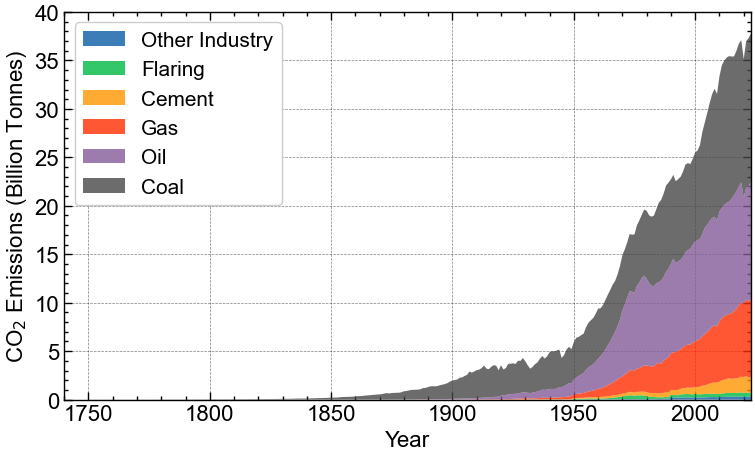

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
from matplotlib.ticker import FuncFormatter
plt.rcParams['font.size'] = 18
plt.style.use(['science','notebook', 'grid']) # Replace 'science' with 'default' if 'science' is not available
matplotlib.rcParams['font.family'] = 'Arial'

# Load the uploaded CSV file
file_path = r'C:\Users\engrt\Downloads\co2 emi.csv'
emissions_data = pd.read_csv(file_path)

# Extract relevant columns for sources of CO₂ emissions
emission_sources = emissions_data[
    ['Year', 
     'Annual CO₂ emissions from other industry', 
     'Annual CO₂ emissions from flaring', 
     'Annual CO₂ emissions from cement', 
     'Annual CO₂ emissions from gas', 
     'Annual CO₂ emissions from oil', 
     'Annual CO₂ emissions from coal']
]

# Rename columns for LaTeX-style labels
emission_sources.rename(columns={
    'Annual CO₂ emissions from other industry': 'Other Industry',
    'Annual CO₂ emissions from flaring': 'Flaring',
    'Annual CO₂ emissions from cement': 'Cement',
    'Annual CO₂ emissions from gas': 'Gas',
    'Annual CO₂ emissions from oil': 'Oil',
    'Annual CO₂ emissions from coal': 'Coal'
}, inplace=True)

# Drop rows with missing year data or all missing source emissions
emission_sources = emission_sources.dropna(subset=['Year']).fillna(0)

# Ensure proper data types
emission_sources['Year'] = emission_sources['Year'].astype(int)

# Remove duplicate columns (if any)
emission_sources_cleaned = emission_sources.loc[:, ~emission_sources.columns.duplicated()]

# Convert all data to billion tonnes by dividing by 1e9
emission_sources_billion = emission_sources_cleaned.set_index('Year') / 1e9

# Calculate total CO₂ emissions for verification
emission_sources_billion['Total'] = emission_sources_billion.sum(axis=1)

# Plot the corrected stacked line shaded graph
plt.figure(figsize=(8, 5))
plt.stackplot(emission_sources_billion.index, 
              emission_sources_billion.iloc[:, :-1].T,  # Exclude 'Total' column
              labels=emission_sources_billion.columns[:-1], 
              alpha=0.8)
#plt.title('Global CO₂ Emissions from Different Sources Over Time', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.ylabel('CO$_2$ Emissions (Billion Tonnes)', fontsize=16)
plt.xlim(1740, 2023)
plt.ylim(0, 40)  # Properly scale the y-axis
plt.legend(loc='upper left', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('CO2 fuelsemission.png', dpi=300, transparent=True)
plt.show()
